<a href="https://colab.research.google.com/github/LOVISHARYX/HRV-and-GSR-as-Viable-Physiological-Markers-for-Mental-Health-Recognition/blob/main/HRV_from_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyhrv


     |████████████████████████████████| 3.2 MB 5.0 MB/s 
     |████████████████████████████████| 230 kB 66.8 MB/s 
     |████████████████████████████████| 1.5 MB 47.3 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
  Created wheel for biosppy: filename=biosppy-0.8.0-py2.py3-none-any.whl size=100176 sha256=715eaa62a10a88609cc938a7a72ad2b0db35bfa86ce9013171b14c86f48d1876
  Stored in directory: /root/.cache/pip/wheels/32/17/9d/77adbf0db713546eaa1c7a1480b2dce91fa724a133115dc20c
  Created wheel for spectrum: filename=spectrum-0.8.1-cp37-cp37m-linux_x86_64.whl size=235155 sha256=6cdeb0e53c4f309fb2f429d4eaf48e3e22c82e7d5bdec957859df55bc076eeeb
  Stored in directory: /root/.cache/pip/wheels/79/db/9c/92fa684ca088447807d08672e7609b48102c6161ac9c7e3c62
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=4e506dc8a4c7395a4c56d4cc2f2f7fc9b6dbaa8d78a942b17002fba363f441ed
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752c

In [2]:
!pip install biosppy

In [3]:
!pip install opensignalsreader

     |████████████████████████████████| 55 kB 2.3 MB/s 


In [4]:
import pyhrv
import pyhrv.tools as tools
from pyhrv.hrv import hrv
from opensignalsreader import OpenSignalsReader
from biosppy.signals.ecg import ecg
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

df= pd.read_excel("/content/drive/MyDrive/HRV/drive01.xlsx")
df=np.array(df)
print(df)


[[-0.026]
 [-0.016]
 [-0.02 ]
 ...
 [ 0.067]
 [ 0.054]
 [ 0.049]]


(61498,)


/usr/local/lib/python3.7/dist-packages/pyhrv/utils.py:368: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/usr/local/lib/python3.7/dist-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/usr/local/lib/python3.7/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


nni_counter 73
nni_mean 754.917808219178
nni_min 87.0
nni_max 3044.0
hr_mean 150.28298533994035
hr_min 19.71090670170828
hr_max 689.6551724137931
hr_std 131.75348597515477
nni_diff_mean 464.22222222222223
nni_diff_min 10
nni_diff_max 2642
sdnn 644.244664390113
sdnn_index nan
sdann nan
rmssd 660.9296903268573
sdsd 473.75420685551916
nn50 66
pnn50 91.66666666666666
nn20 70
pnn20 97.22222222222221
nni_histogram Figure(432x432)
tinn_n 210.9375
tinn_m 492.1875
tinn 281.25
tri_index 36.5
fft_bands ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4))
fft_peak (0.01171875, 0.05859375, 0.1611328125)
fft_abs (60573.681398060406, 161975.3487932546, 310079.6242774754)
fft_rel (11.372591558836184, 30.4105585447329, 58.21684989643092)
fft_log (11.01161577735965, 11.995199434692932, 12.644584395988357)
fft_norm (34.31281482739197, 65.68718517260804)
fft_ratio 0.522366953877339
fft_total 532628.6544687904
fft_plot Figure(864x360)
fft_nfft 4096
fft_window hamming
fft_resampling_frequ

'/content/drive/MyDrive/HRV/SampleExport.json'

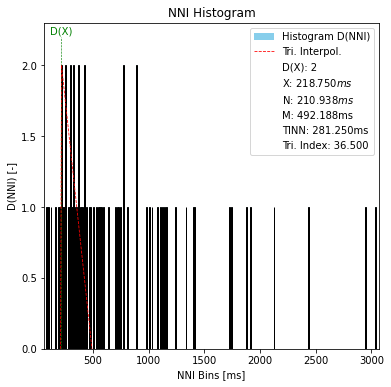

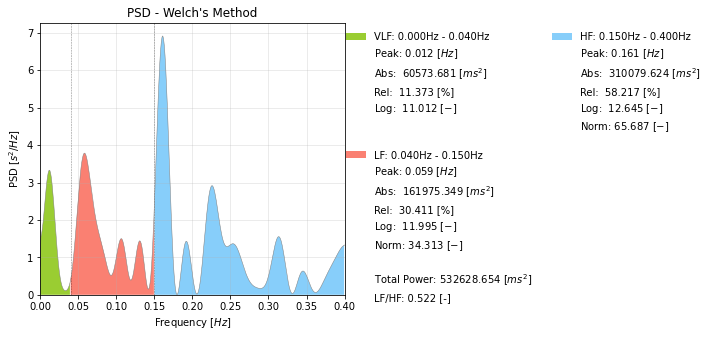

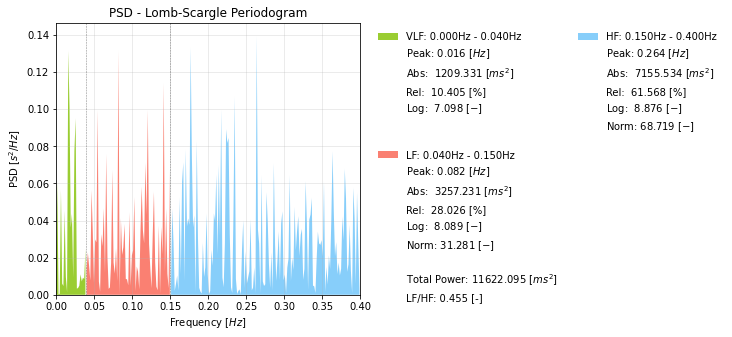

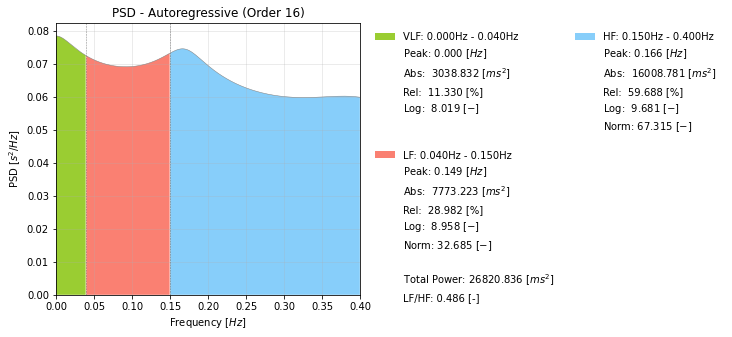

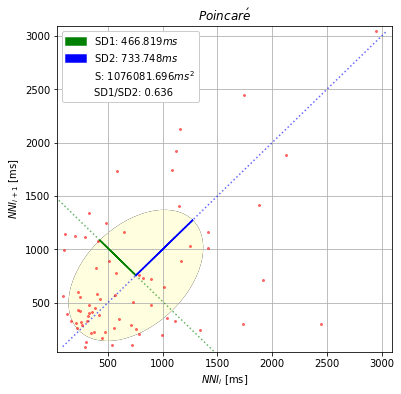

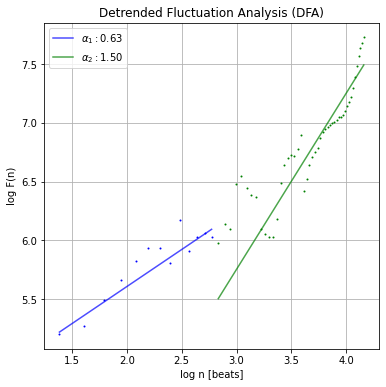

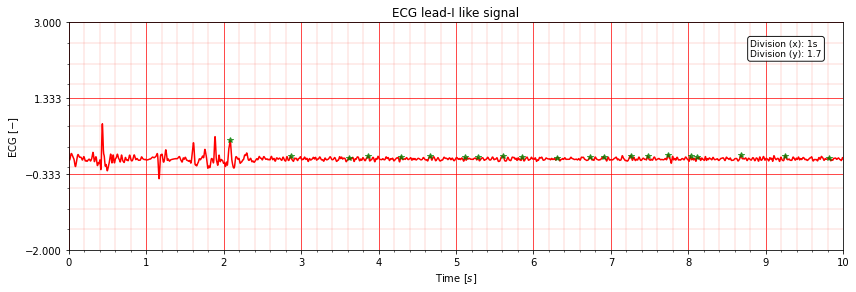

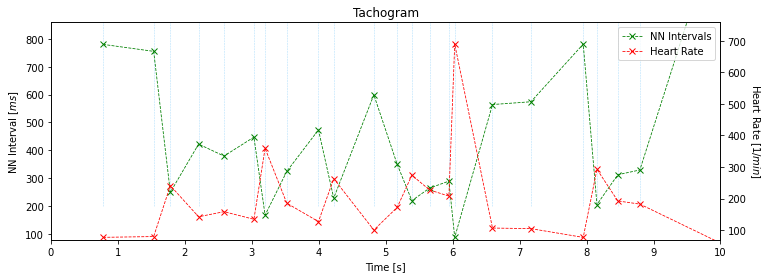

In [8]:
# Specify the file path of your OpenSignals file (absolute file path is recommended)
# fpath = 'out.txt'
# i=0
# with open(fpath) as fp:
#   for line in fp:
#     if i<5:
#       print(line)
#       i+=1
# Load the acquisition file
# acq = OpenSignalsReader(fpath)

# Get the ECG signal
# signal = acq.signal('ECG')

# Filter ECG signal and extract the R-peak locations
# filtered_signal, rpeaks = ecg(signal)[1:3]
df= pd.read_excel("/content/drive/MyDrive/HRV/drive01.xlsx")
df=np.array(df)
df=df.flatten()
print(df.shape)

# Compute all HRV parameters with default input parameters
results = hrv(signal=df)

# Print all the parameters keys and values individually
for key in results.keys():
   print(key, results[key])

# Create HRV report in .TXT format
tools.hrv_export(results, efile='SampleExport', path='/content/drive/MyDrive/HRV/')

In [10]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


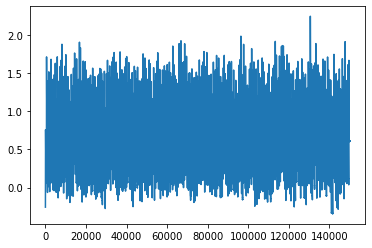

In [11]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns
from matplotlib.patches import Ellipse

ppg_simulated=nk.ppg_simulate(duration=300, sampling_rate=500, heart_rate=60)
plt.plot(ppg_simulated)
plt.show()

In [12]:
ppg_and_ecg=nk.data(dataset="bio_resting_5min_100hz")